In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# looking for missing value

In [3]:
import missingno as msno

<AxesSubplot:>

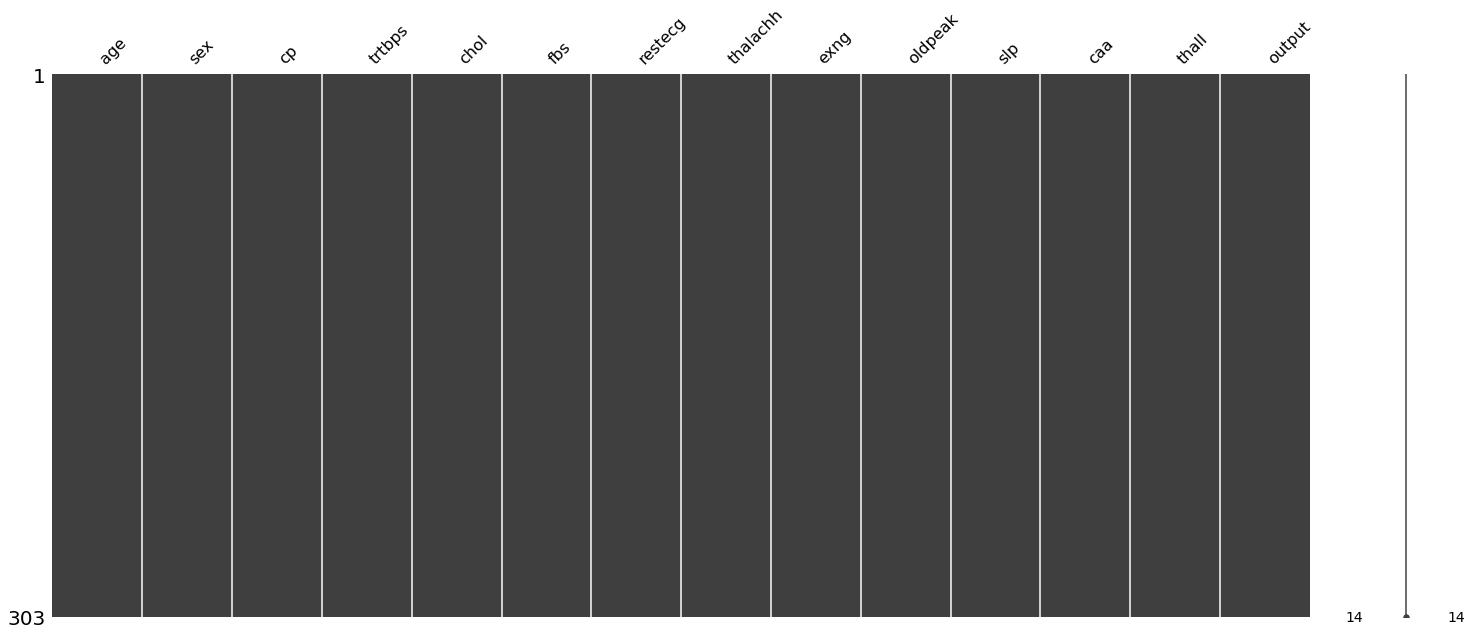

In [4]:
msno.matrix(df)

# checking output distribution

<AxesSubplot:xlabel='output', ylabel='count'>

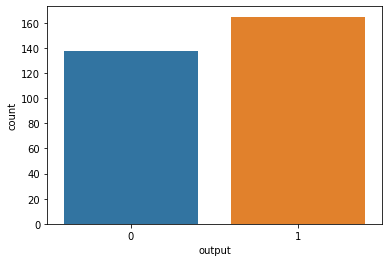

In [5]:
sns.countplot(data = df, x = 'output')    

# pivot tables

In [6]:
df['index']=df.index.values

In [7]:
pd.pivot_table(df,values = 'index',columns = 'output',aggfunc = 'count')

output,0,1
index,138,165


In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,index
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4


In [9]:
pd.pivot_table(df,values='index', columns = 'fbs', aggfunc = 'count')

fbs,0,1
index,258,45


In [10]:
pd.pivot_table(df,values='index', columns = 'sex', aggfunc = 'count')

sex,0,1
index,96,207


# Features Distrubutions and indentifications

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  index     303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [49]:
cat_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
num_features = [item for item in df.columns if item != 'index' and item not in cat_features]
num_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# column not in cat_feature and 'index' are num features

# Express all cat features using bar plot

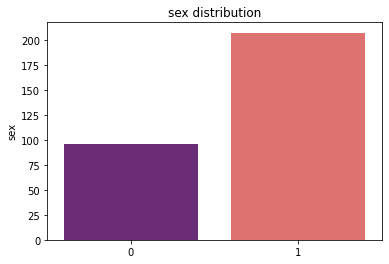

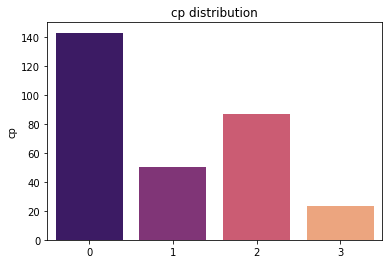

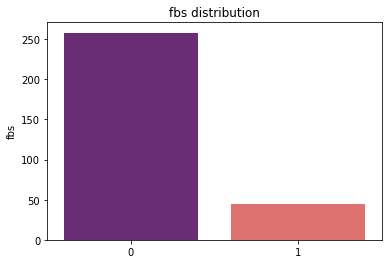

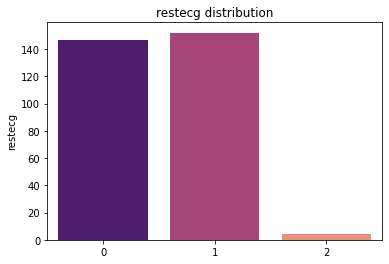

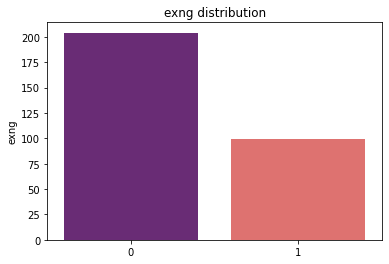

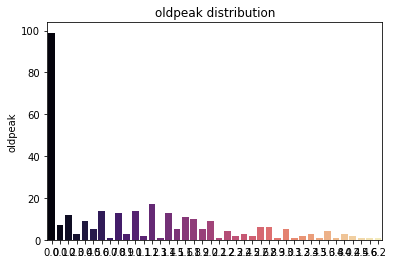

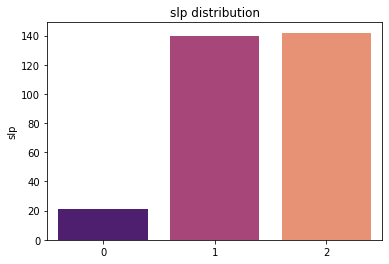

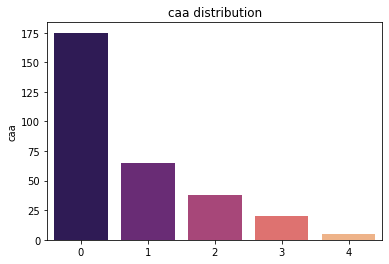

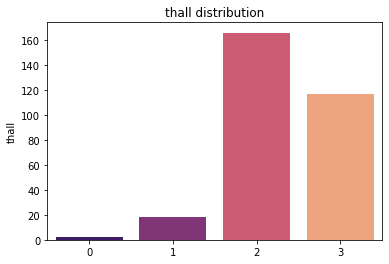

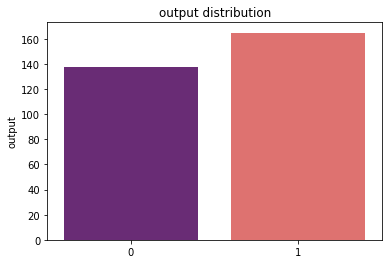

In [14]:
for feature in cat_features:
    cat = df[feature].value_counts()
    sns.barplot(cat.index,cat, palette = 'magma')
    plt.title(feature + " distribution")
    plt.show()

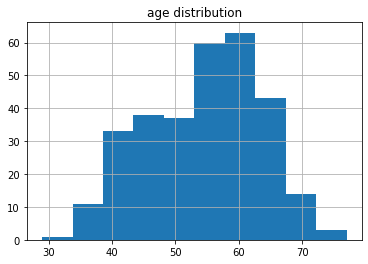

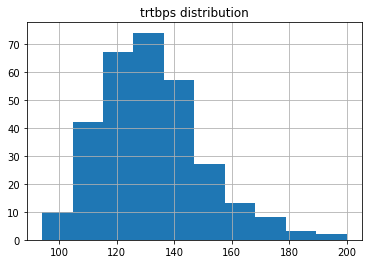

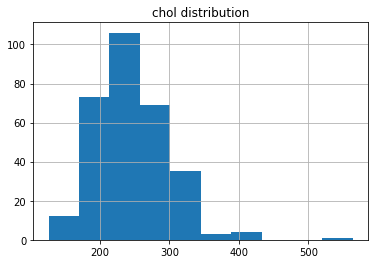

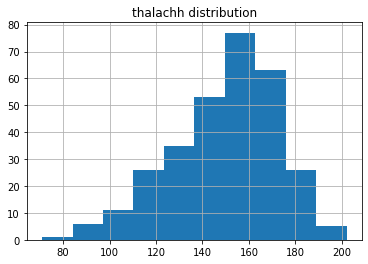

In [15]:
for feature in num_features:
    df[feature].hist()
    plt.title(feature + " distribution")
    plt.show()

In [16]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,index
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.185153
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,0.201132
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.399163
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.108507
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.020258
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.000743
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.021130
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.404972
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.363788
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.298161


# Data exploration

<AxesSubplot:>

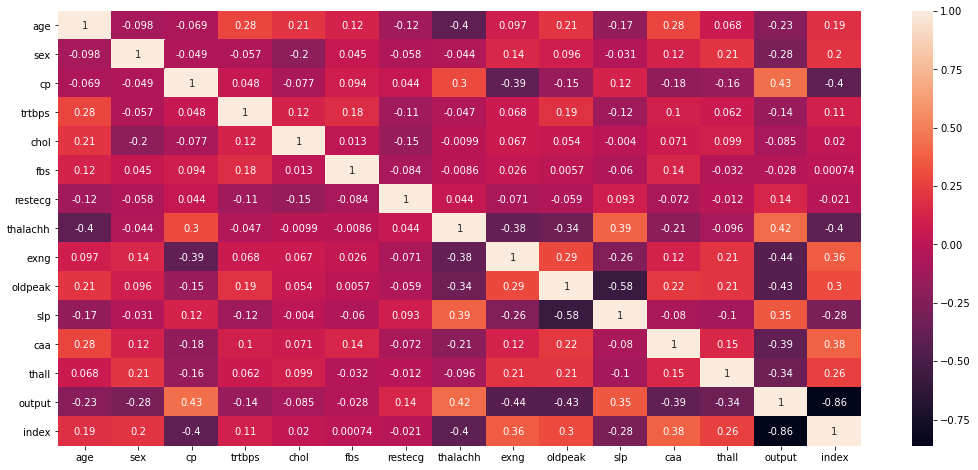

In [17]:
plt.figure(figsize = (18,8))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

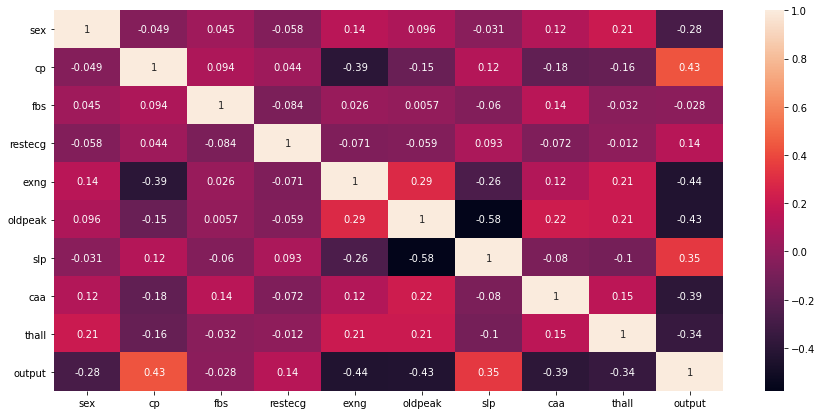

In [19]:
plt.figure(figsize = (15,7))
sns.heatmap(df[cat_features].corr(), annot = True)

In [18]:
output_with_num = num_features.copy()
output_with_num.append('output')
output_with_num

['age', 'trtbps', 'chol', 'thalachh', 'output']

<AxesSubplot:>

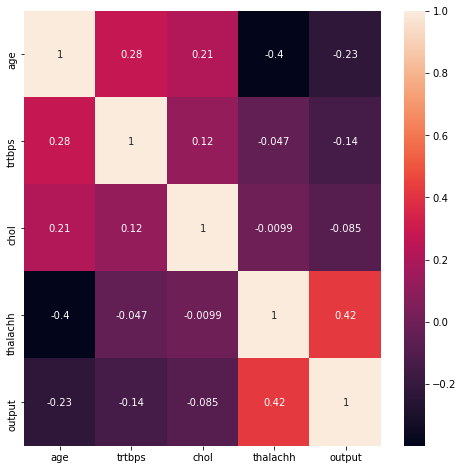

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df[output_with_num].corr(), annot = True)

# Questions worth answering 

In [ ]:
#1. are heart attacks affected by sex ?
#2. is chest pain shows any indication for heart attacks ?
#3. if sex plays a role does it also has any relation with the chest pain?
#4. what do you think the relation between fasing blood sugar with the heat attacks ?
#5. what is the relation between heart attacks and resting electrocardiographic results?
#6. excersie exang with the heart attacks ?
#7. does Slope plays any role showing a possibility of a heat attack? 
#8. Slope with people who experienced heart attacks of different sex?
#9. number of major vessels .. I think I works agaisnist heat attacks lets see what is our data answering this?
#10. maximum heat reate how you can infer the effect with heat attacks ? 
#11. is there any possibility that maximum heat rate with the number of major vessels do any relation with heat attack?

In [22]:
#1. are heart attacks affected by sex ?

In [20]:
pd.pivot_table(df, values ='index', columns = 'sex',index = 'output', aggfunc = 'count')

sex,0,1
output,,
0,24,114
1,72,93


<AxesSubplot:xlabel='sex', ylabel='count'>

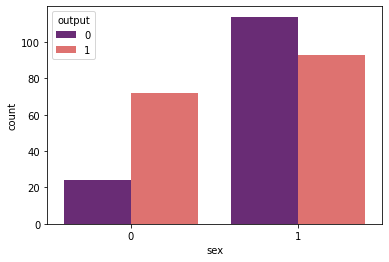

In [21]:
sns.countplot(data = df, x = 'sex', hue = 'output',palette = 'magma')

In [ ]:
#Ans: sex '0' has more chance of heart attack than sex '1'

In [ ]:
#2. is chest pain shows any indication for heart attacks ?

In [22]:
pd.pivot_table(df,values = 'index', columns = 'cp',index = 'output',aggfunc = 'count')

cp,0,1,2,3
output,,,,
0,104,9,18,7
1,39,41,69,16


<AxesSubplot:xlabel='cp', ylabel='count'>

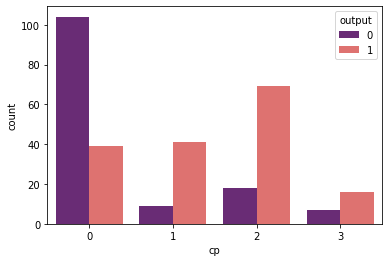

In [23]:
sns.countplot(data = df, x = 'cp',hue = 'output',palette = 'magma')

In [ ]:
#Ans: yes, chest pain shows indication of heart attack(persons with chest pain type 1 and 2 are prone to heart attack than with no chest pain.)

In [ ]:
#3. if sex plays a role, does it also has any relation with the chest pain?

In [24]:
pd.pivot_table(df,values = 'index', columns = 'cp', index = 'sex', aggfunc = 'count')

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


<AxesSubplot:xlabel='cp', ylabel='count'>

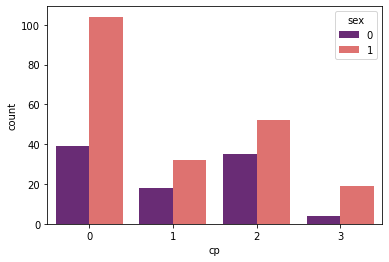

In [25]:
sns.countplot(data = df, x = 'cp', hue = 'sex', palette = 'magma')

In [ ]:
#Ans: Gender '1' has more complaints of chest pain

In [ ]:
#4. what do you think the relation between fasting blood sugar with the heart attacks ?

In [26]:
pd.pivot_table(df, values = 'index',columns = 'fbs', index = 'output', aggfunc = 'count')

fbs,0,1
output,,
0,116,22
1,142,23


<AxesSubplot:xlabel='fbs', ylabel='count'>

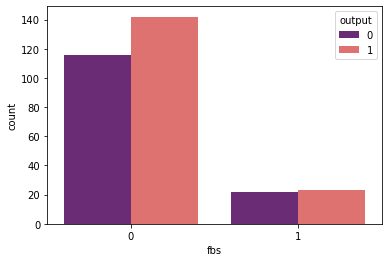

In [27]:
sns.countplot(data = df, x = 'fbs', hue = 'output', palette = 'magma')

In [ ]:
#Ans: fasting blood sugar has no relationship with heart attack

In [ ]:
#5. what is the relation between heart attacks and resting electrocardiographic results?

In [28]:
pd.pivot_table(df, values = 'index',columns = 'restecg', index = 'output', aggfunc = 'count')

restecg,0,1,2
output,,,
0,79,56,3
1,68,96,1


<AxesSubplot:xlabel='restecg', ylabel='count'>

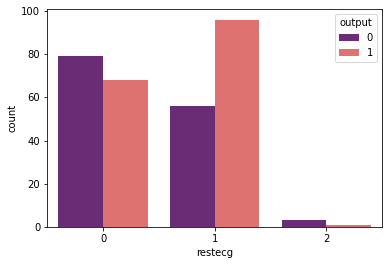

In [29]:
sns.countplot(data = df, x = 'restecg', hue = 'output', palette ='magma')

In [ ]:
#Ans: resting electrocardiographic result '1' has increases chance of heart attack than '0'&'2'

In [ ]:
#6. excersie exang with the heart attacks ?

In [30]:
pd.pivot_table(df,values = 'index', columns ='exng', index = 'output', aggfunc ='count')

exng,0,1
output,,
0,62,76
1,142,23


<AxesSubplot:xlabel='exng', ylabel='count'>

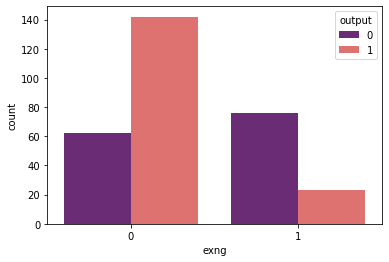

In [31]:
sns.countplot(data = df, x = 'exng', hue ='output', palette = 'magma')

In [ ]:
#Ans: Exercise induced angina reduces chances of heart attack

In [ ]:
#7. does Slope plays any role showing a possibility of a heart attack? 

In [32]:
pd.pivot_table(df, values = 'index', columns ='slp', index = 'output', aggfunc ='count')

slp,0,1,2
output,,,
0,12,91,35
1,9,49,107


<AxesSubplot:xlabel='slp', ylabel='count'>

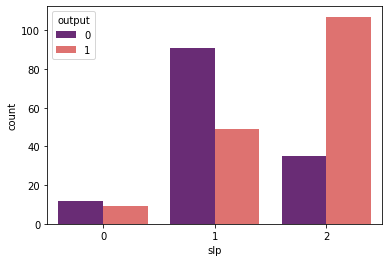

In [33]:
sns.countplot(data=df, x = 'slp', hue = 'output', palette = 'magma')

In [ ]:
#Ans: slope type '2' increases chance of heart attack

In [ ]:
#8. Slope with people who experienced heart attacks of different sex?

In [34]:
pd.pivot_table(df[df['sex']==1],values = 'index', columns = 'slp', index = 'output', aggfunc = 'count')

slp,0,1,2
output,,,
0,9,72,33
1,7,23,63


<AxesSubplot:xlabel='slp', ylabel='count'>

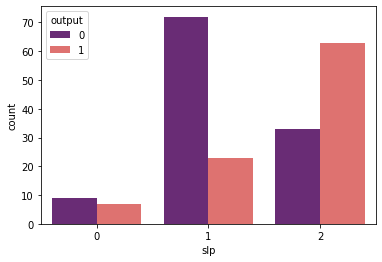

In [35]:
sns.countplot(data = df[df['sex']==1], x = 'slp', hue = 'output', palette = 'magma')

In [ ]:
#Ans: slope type '2' increases chance of heart attack in gender '1'

In [36]:
pd.pivot_table(df[df['sex']==0], values = 'index', columns = 'slp', index = 'output', aggfunc = 'count')

slp,0,1,2
output,,,
0,3,19,2
1,2,26,44


<AxesSubplot:xlabel='slp', ylabel='count'>

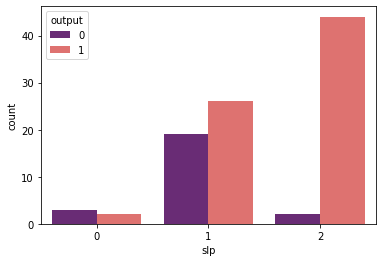

In [44]:
sns.countplot(data = df[df['sex']==0], x = 'slp', hue = 'output', palette = 'magma')

In [ ]:
#Ans: unlike gender '1', in gender '0' slope type '1' also increases chance of heart attack, while slope type '2' has significant chances of heart attack

In [ ]:
#9. number of major vessels .. I think I works agaisnist heat attacks lets see what is our data answering this?

In [37]:
pd.pivot_table(df, values = 'index', columns = 'caa', index = 'output', aggfunc = 'count')

caa,0,1,2,3,4
output,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


<AxesSubplot:xlabel='caa', ylabel='count'>

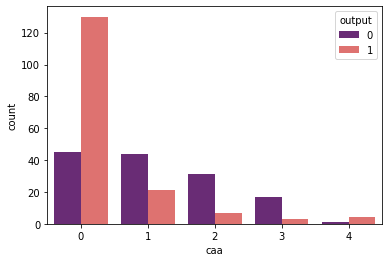

In [38]:
sns.countplot(data = df, x = 'caa', hue = 'output', palette = 'magma')

In [ ]:
#Ans: '0' major vessels prone to heartattack. 

In [ ]:
#10. maximum heart reate how you can infer the effect with heat attacks ? 

In [39]:
pd.pivot_table(df,values = 'index', columns = 'thall', index = 'output', aggfunc = 'count')

thall,0,1,2,3
output,,,,
0,1,12,36,89
1,1,6,130,28


<AxesSubplot:xlabel='thall', ylabel='count'>

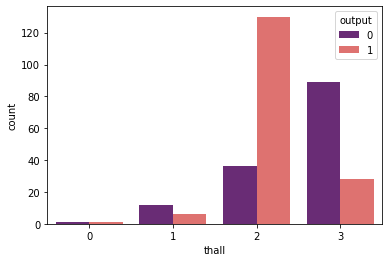

In [40]:
sns.countplot(data = df, x = 'thall', hue = 'output', palette = 'magma')

In [ ]:
#Ans: Thall type '2' has more chances of heart attack

In [ ]:
#11. is there any possibility that maximum heart rate with the number of major vessels do any relation with heart attack?

In [41]:
unique_vessels = df.thall.unique()
unique_vessels

array([1, 2, 3, 0], dtype=int64)

In [42]:
for vessel in unique_vessels:
    print("vessel value is", vessel)
    print(pd.pivot_table(df[df['thall']== vessel], values = 'index', columns = 'caa', index = 'output', aggfunc = 'count'))
    print('-'*50)

vessel value is 1
caa       0    1    2    3
output                    
0       2.0  4.0  4.0  2.0
1       6.0  NaN  NaN  NaN
--------------------------------------------------
vessel value is 2
caa         0     1    2    3    4
output                            
0        12.0  12.0  7.0  5.0  NaN
1       102.0  17.0  7.0  1.0  3.0
--------------------------------------------------
vessel value is 3
caa        0     1     2     3    4
output                             
0       30.0  28.0  20.0  10.0  1.0
1       21.0   4.0   NaN   2.0  1.0
--------------------------------------------------
vessel value is 0
caa     0
output   
0       1
1       1
--------------------------------------------------


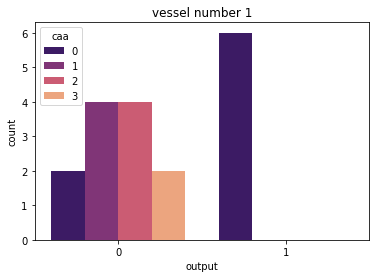

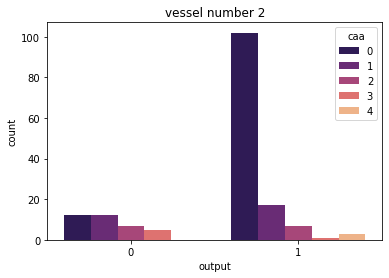

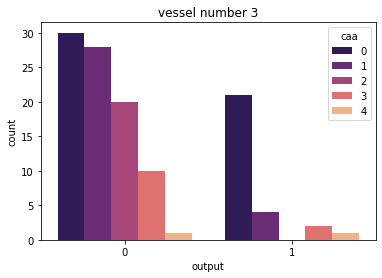

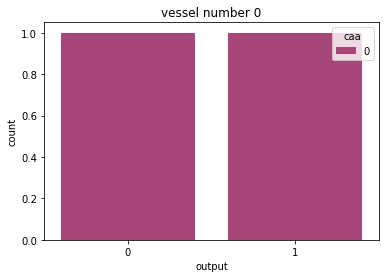

In [43]:
for vessel in unique_vessels:
    sns.countplot(data = df[df['thall']== vessel], x = 'output', hue = 'caa', palette = 'magma')
    plt.title("vessel number "+str(vessel))
    plt.show()

In [ ]:
#Ans: there is no relation between maximum heart rate and number of major vessels

In [ ]:
"""
second part : questions to answer regarding to the numeric data
#12. how age effects the heart attack?
#13. resting blood pressure and heart attack ?
#14. I think cholestrol has a direct impact on the heart attack output?? lets try to prove that..
#15. Maximum heat reate relationship with the heart attack?
#16. old peak how it would affect heart attack?
"""

In [ ]:
#12. how age effects the heart attack?

<AxesSubplot:xlabel='age', ylabel='Count'>

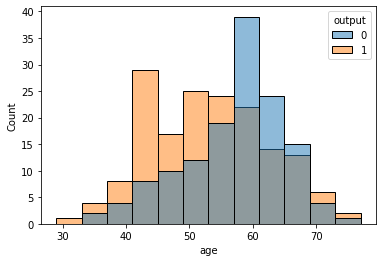

In [44]:
sns.histplot(data=df, x = 'age',hue='output')

In [ ]:
#ans: age group 30 - 55 has more chances of heart attacks

In [ ]:
#13. resting blood pressure and heart attack ?

<AxesSubplot:xlabel='trtbps', ylabel='Count'>

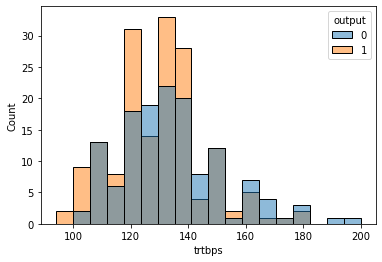

In [45]:
sns.histplot(data=df, x = 'trtbps', hue = 'output')

In [46]:
#Ans: Resting blood pressure has no effect on heart attack(since normal level = 90 - 120 ~ 140)

In [ ]:
#14. I think cholestrol has a direct impact on the heart attack output?? lets try to prove that..

<AxesSubplot:xlabel='chol', ylabel='Count'>

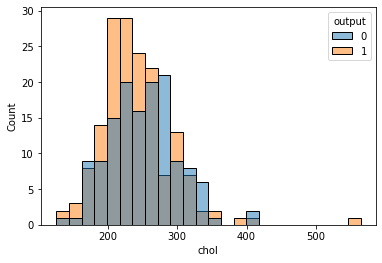

In [47]:
sns.histplot(data = df, x = 'chol', hue = 'output')

In [ ]:
#Ans: 180 - 250 level of cholesterol has some effect on heart attack.

In [ ]:
#15. Maximum heart rate relationship with the heart attack?

<AxesSubplot:xlabel='thalachh', ylabel='Count'>

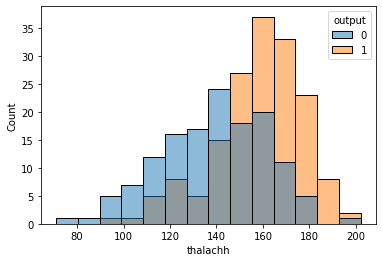

In [48]:
sns.histplot(data = df, x='thalachh', hue='output')

In [ ]:
#Ans: higher values of heart rate causes heart attack

In [ ]:
#16. old peak how it would affect heart attack?

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

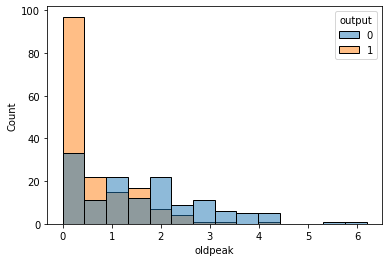

In [50]:
sns.histplot(data = df, x = 'oldpeak', hue = 'output')

In [ ]:
#Ans: higher the old peak values lesser/no the effect of heart attack

# Logistic Regression

In [51]:
dummies = pd.get_dummies(df)

In [61]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,index
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4


In [62]:
inputs = df.drop(['output','index'],axis = 1)
target = df['output']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target, test_size=0.2, random_state = 42)

In [74]:
len(x_train), len(x_test)

(242, 61)

In [86]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [87]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [88]:
log_model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [100]:
print("Logistic regression model accuracy is,",round(log_model.score(x_test,y_test)*100,2),"%")

Logistic regression model accuracy is, 88.52 %


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [91]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
dt_model.predict(x_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [101]:
print("Decision Tree model accuracy is,",round(dt_model.score(x_test,y_test)*100,2),'%')

Decision Tree model accuracy is, 81.97 %
